# TAHAP MODELING - KAIZEN 2

Pada tahap pengklasifikasian ini menggunakan model CNN


In [ ]:
import pickle
import numpy as np
import os
from matplotlib import pyplot as plt
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
data_dict = pickle.load(open('./data.pickle', 'rb'))

In [ ]:
X = np.asarray(data_dict['sequences'])
y = np.asarray(data_dict['labels'])

In [ ]:
y = to_categorical(y).astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03)

In [ ]:
X_train.shape

(72, 15, 1662)

In [ ]:
input_shape = X_train.shape[1:] 
input_shape_reshaped = (input_shape[0], input_shape[1], 1)

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Concatenate, Dropout, Flatten, Dense

def create_cpm_model(input_shape, num_landmarks,num_classes):
    # Backbone network
    backbone_input = tf.keras.Input(shape=input_shape)
    backbone = Conv2D(64, (3, 3), activation='relu', padding='same')(backbone_input)
    # Add more layers or modify the backbone architecture as needed
    
    # Stage 1
    stage1 = Conv2D(128, (3, 3), activation='relu', padding='same')(backbone)
    stage1 = Conv2D(num_landmarks, (1, 1), activation='relu')(stage1)
    
    # Stage 2
    stage2_input = Concatenate()([backbone, stage1])
    stage2 = Conv2D(64, (3, 3), activation='relu', padding='same')(stage2_input)
    stage2 = Conv2D(num_landmarks, (1, 1), activation='relu')(stage2)
    
    # Add more stages as needed
    
    # Output layer
    output = stage2  # Modify this if you want to use a different stage
    output = Dense(32, activation='relu')(output)
    output = Dense(num_classes, activation='softmax')(output)
        
    model = Model(inputs=backbone_input, outputs=output)
    return model

In [ ]:
num_landmarks = 45
num_classes = 5
cpm_model = create_cpm_model(input_shape_reshaped, num_landmarks,num_classes)

In [ ]:
cpm_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = cpm_model.fit(X_train, y_train, 
              epochs=110, 
              callbacks=[tb_callback],
              validation_data=( X_test,y_test))

Epoch 1/110
3/3 [==============================] - 1s 182ms/step - loss: 5.0034e-06 - accuracy: 1.0000 - val_loss: 9.4802e-05 - val_accuracy: 1.0000
Epoch 2/110
3/3 [==============================] - 1s 163ms/step - loss: 4.9124e-06 - accuracy: 1.0000 - val_loss: 1.2114e-04 - val_accuracy: 1.0000
Epoch 3/110
3/3 [==============================] - 1s 167ms/step - loss: 4.7633e-06 - accuracy: 1.0000 - val_loss: 8.9598e-05 - val_accuracy: 1.0000
Epoch 4/110
3/3 [==============================] - 1s 165ms/step - loss: 4.6739e-06 - accuracy: 1.0000 - val_loss: 6.3217e-05 - val_accuracy: 1.0000
Epoch 5/110
3/3 [==============================] - 1s 169ms/step - loss: 4.4951e-06 - accuracy: 1.0000 - val_loss: 7.3785e-05 - val_accuracy: 1.0000
Epoch 6/110
3/3 [==============================] - 1s 168ms/step - loss: 4.3097e-06 - accuracy: 1.0000 - val_loss: 7.2315e-05 - val_accuracy: 1.0000
Epoch 7/110
3/3 [==============================] - 1s 165ms/step - loss: 4.0878e-06 - accuracy: 1.0000 - v

In [ ]:
cpm_model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 15, 1662, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_71 (Conv2D)             (None, 15, 1662, 64  640         ['input_16[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_72 (Conv2D)             (None, 15, 1662, 12  73856       ['conv2d_71[0][0]']              
                                8)                                                         

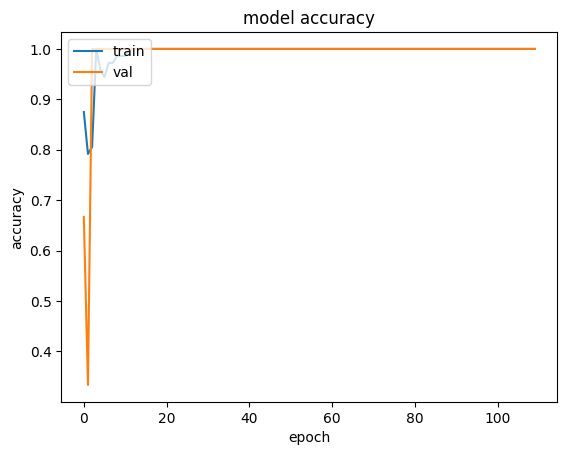

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

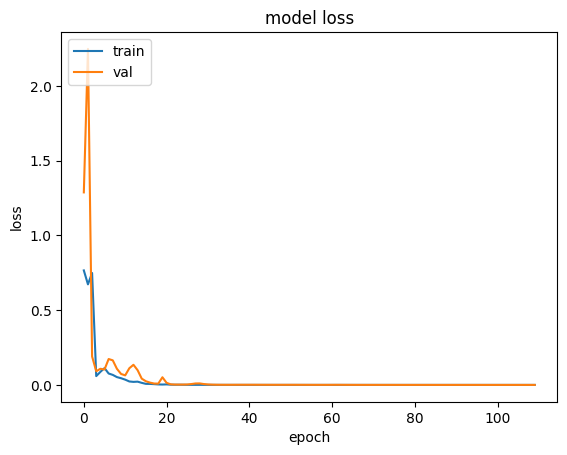

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
cpm_model.save('model_CPM_new.h5')